# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Glioma Tumor Grading/Native (T1)/DATA/BraTS2019_Features_T1.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Glioma Tumor Grading/Native (T1)/DATA/BraTS2020_Features_T1.csv')

In [ ]:
combined_df = pd.concat([df_2019,df_2020], ignore_index=True)
combined_df.head(5)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},33e08f677effad5e6754e93801c0729343666c94,3D,"(1.0, 1.0, 1.0)",...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73620355b22a3b037d6fc276d63517e4eef37d70,3D,"(1.0, 1.0, 1.0)",...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d9b9dee5c48b51d0edab0c5449bfed18b03f72e3,3D,"(1.0, 1.0, 1.0)",...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb07dcdfb04857334dc375bd17a2ab2d5b68d2da,3D,"(1.0, 1.0, 1.0)",...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},215b71e2f162abf87c53da2a5c4df9cba50e88f1,3D,"(1.0, 1.0, 1.0)",...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 713.1+ KB


In [ ]:
combined_df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,702.000000,702.0,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,...,702.000000,702.000000,702.000000,702.000000,7.020000e+02,702.000000,702.000000,702.000000,7.020000e+02,702.000000
mean,102.479578,0.0,1684.015544,22405.155271,33.713675,0.723794,0.556487,24.547564,45.792875,45.098625,...,367.257695,0.031415,5.699109,0.096236,5.980190e+05,42.361902,0.008362,3989.484411,3.164356e-02,1.362120
std,180.209570,0.0,3591.800905,30393.118751,36.390916,0.155002,0.147949,10.236928,19.477477,16.218948,...,2629.039935,0.049106,1.091967,0.122032,3.373372e+06,524.901589,0.034248,42096.340228,5.647936e-02,7.015730
min,6.609346,0.0,111.000000,47.000000,1.000000,0.222498,0.124907,3.738339,7.287142,8.062258,...,1.078749,0.000039,1.584963,0.000322,5.684114e-01,0.004755,0.000090,0.000411,1.629837e-07,0.000775
25%,45.953831,0.0,675.250000,3883.000000,8.000000,0.635373,0.465009,17.272473,32.733853,33.335023,...,18.290319,0.008149,5.032331,0.025840,2.054488e+03,1.959189,0.000565,16.734985,1.095305e-02,0.053374
50%,57.862926,0.0,869.000000,10496.000000,22.000000,0.745065,0.575800,23.502447,43.940747,43.800640,...,35.733310,0.018506,5.595141,0.056182,1.853754e+04,5.512036,0.001159,41.858704,1.907498e-02,0.143446
75%,85.511518,0.0,1457.500000,25394.000000,46.000000,0.841699,0.663039,30.832017,56.195239,55.955331,...,81.333669,0.035302,6.344304,0.102035,9.970415e+04,13.918132,0.003216,114.677438,2.921661e-02,0.454659
max,1778.219889,0.0,32767.000000,189152.000000,270.000000,0.984177,0.878147,59.587263,171.979417,105.475116,...,44923.941306,0.559769,8.940406,0.770955,4.237417e+07,9818.926992,0.521373,670390.979289,6.787136e-01,106.860586


In [ ]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [ ]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [ ]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 619.9+ KB


In [ ]:
combined_df.shape

(702, 113)

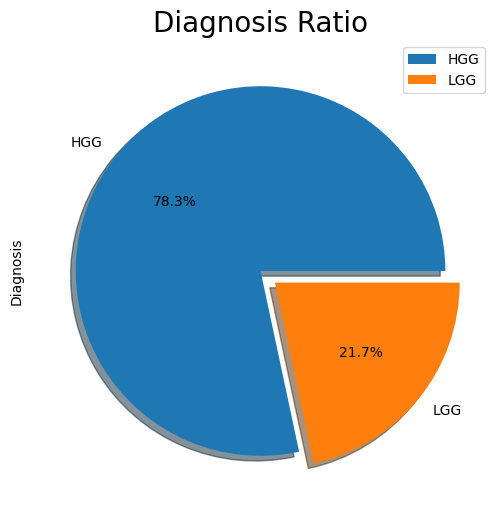

In [ ]:
plt.figure(figsize=(13,6))
combined_df['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Diagnosis Ratio", fontsize = 20)
plt.legend(['HGG','LGG'])
plt.show()

In [ ]:
combined_df.head(5)

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,63.008830,0.0,1043.0,27189,115,0.739545,0.687078,30.967202,45.070872,57.428216,...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,42.644644,0.0,726.0,45839,108,0.712809,0.693697,39.632601,57.132479,64.884513,...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,46.487673,0.0,594.0,34343,85,0.878777,0.533268,35.224154,66.053440,65.795137,...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,63.166312,0.0,1042.0,413,18,0.770522,0.445620,8.942993,20.068633,25.553865,...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,107.963487,0.0,1696.0,21122,95,0.880661,0.523184,26.644419,50.927387,53.665631,...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


# Preprocessing

In [ ]:
X=combined_df.drop(columns=['Diagnosis'],axis=1)

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(combined_df['Diagnosis'])

In [ ]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (561, 112)
y_train Shape: (561,)
X_test Shape: (141, 112)
X_test Shape: (141,)


# Machine Learning

**K-NN**

In [ ]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
MSE = [1 - x for x in cv_scores]

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


F1 Score: 91.23
Recall Score: 86.67
Precision Score: 96.30
Specificity: 99.10
Accuracy:95.72
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       111
           1       0.96      0.87      0.91        30

    accuracy                           0.96       141
   macro avg       0.96      0.93      0.95       141
weighted avg       0.96      0.96      0.96       141



<Axes: >

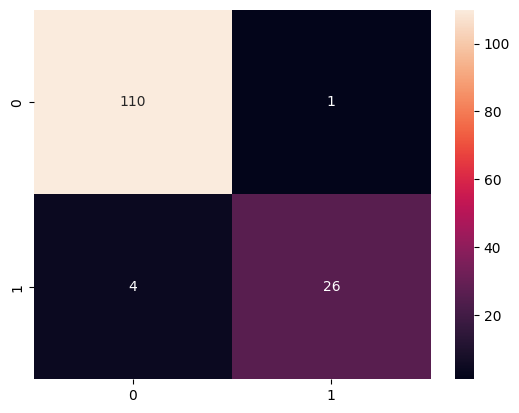

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
re_knn = recall_score(y_test , knn_pred)*100
print(f"Recall Score: {re_knn:.2f}")
pre_knn = precision_score(y_test , knn_pred)*100
print(f"Precision Score: {pre_knn:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_knn = tn / (tn + fp)*100
print(f"Specificity: {speci_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

ROC AUC: 92.88


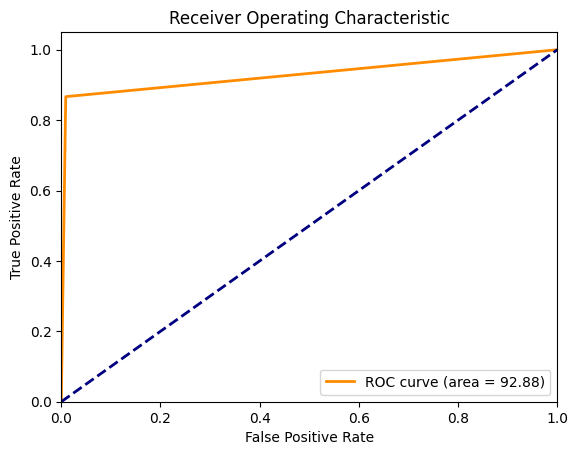

In [ ]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
roc_knn = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_knn:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

F1 Score: 87.27
Recall Score: 80.00
Precision Score: 96.00
Specificity: 99.10
Accuracy:92.69
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       111
           1       0.96      0.80      0.87        30

    accuracy                           0.95       141
   macro avg       0.95      0.90      0.92       141
weighted avg       0.95      0.95      0.95       141



<Axes: >

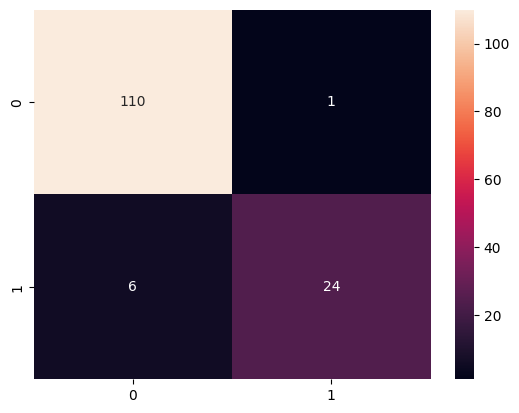

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
f1_lgr = f1_score(y_test , lgr_pred)*100
print(f"F1 Score: {f1_lgr:.2f}")
re_lgr = recall_score(y_test , lgr_pred)*100
print(f"Recall Score: {re_lgr:.2f}")
pre_lgr = precision_score(y_test , lgr_pred)*100
print(f"Precision Score: {pre_lgr:.2f}")
cm = confusion_matrix(y_test, lgr_pred)
tn, fp, fn, tp = cm.ravel()
speci_lgr = tn / (tn + fp)*100
print(f"Specificity: {speci_lgr:.2f}")
acc_lgr = accuracies.mean()*100
print(f"Accuracy:{(acc_lgr):.2f}")
print(classification_report(y_test, lgr_pred))
sns.heatmap(confusion_matrix(y_test,lgr_pred), annot= True, fmt= 'g')

ROC AUC: 89.55


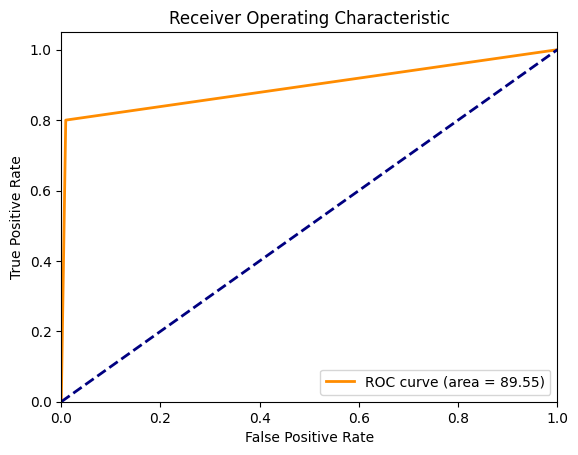

In [ ]:
fpr, tpr, _ = roc_curve(y_test, lgr_pred)
roc_lgr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_lgr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_lgr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Decision Tree Classifier**

F1 Score: 91.80
Recall Score: 93.33
Precision Score: 90.32
Specificity: 97.30
Accuracy:95.55
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.90      0.93      0.92        30

    accuracy                           0.96       141
   macro avg       0.94      0.95      0.95       141
weighted avg       0.97      0.96      0.96       141



<Axes: >

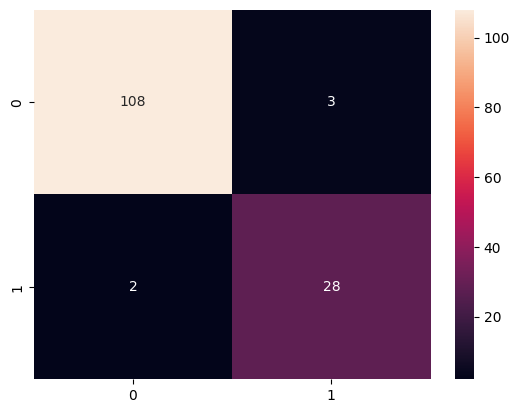

In [ ]:
dtr = DecisionTreeClassifier(criterion = 'entropy',random_state = 40)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
accuracies = cross_val_score(estimator = dtr, X = X_train, y = y_train, cv = 10)
f1_dtr = f1_score(y_test , dtr_pred)*100
print(f"F1 Score: {f1_dtr:.2f}")
re_dtr = recall_score(y_test , dtr_pred)*100
print(f"Recall Score: {re_dtr:.2f}")
pre_dtr = precision_score(y_test , dtr_pred)*100
print(f"Precision Score: {pre_dtr:.2f}")
cm = confusion_matrix(y_test, dtr_pred)
tn, fp, fn, tp = cm.ravel()
speci_dtr = tn / (tn + fp)*100
print(f"Specificity: {speci_dtr:.2f}")
acc_dtr = accuracies.mean()*100
print(f"Accuracy:{(acc_dtr):.2f}")
print(classification_report(y_test, dtr_pred))
sns.heatmap(confusion_matrix(y_test,dtr_pred), annot= True, fmt= 'g')

ROC AUC: 95.32


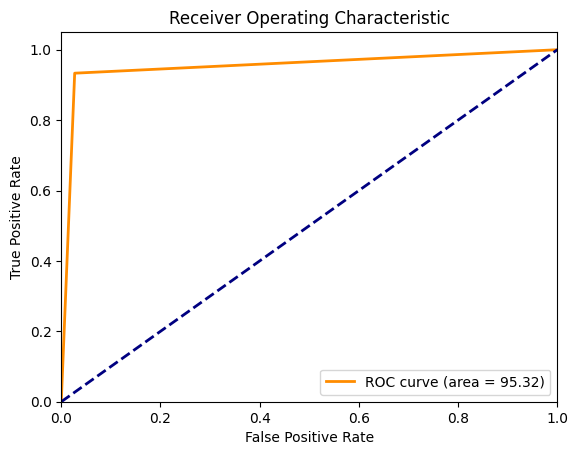

In [ ]:
fpr, tpr, _ = roc_curve(y_test, dtr_pred)
roc_dtr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_dtr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_dtr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

F1 Score: 96.55
Recall Score: 93.33
Precision Score: 100.00
Specificity: 100.00
Accuracy:96.79
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       1.00      0.93      0.97        30

    accuracy                           0.99       141
   macro avg       0.99      0.97      0.98       141
weighted avg       0.99      0.99      0.99       141



<Axes: >

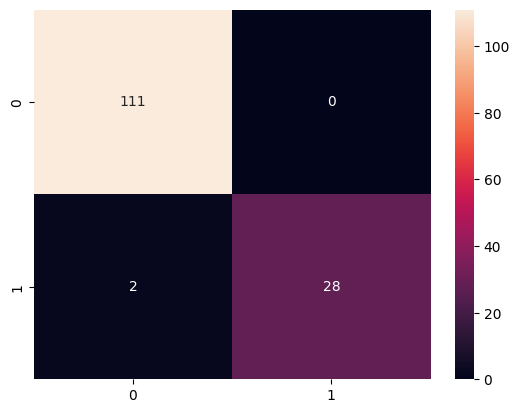

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
f1_rf = f1_score(y_test , rf_pred)*100
print(f"F1 Score: {f1_rf:.2f}")
re_rf = recall_score(y_test , rf_pred)*100
print(f"Recall Score: {re_rf:.2f}")
pre_rf = precision_score(y_test , rf_pred)*100
print(f"Precision Score: {pre_rf:.2f}")
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()
speci_rf = tn / (tn + fp)*100
print(f"Specificity: {speci_rf:.2f}")
acc_rf = accuracies.mean()*100
print(f"Accuracy:{(acc_rf):.2f}")
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test,rf_pred), annot= True, fmt= 'g')

ROC AUC: 96.67


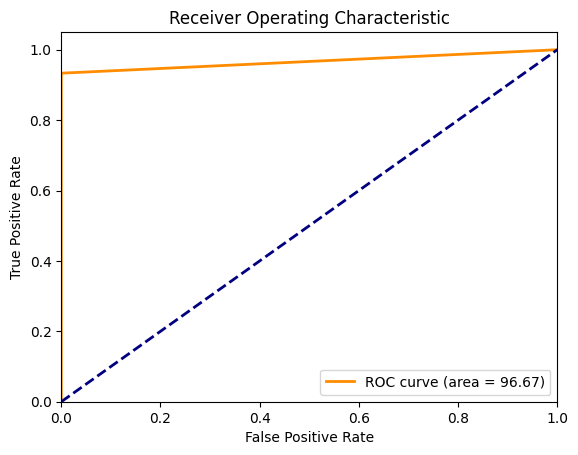

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_rf = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_rf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

F1 Score: 88.14
Recall Score: 86.67
Precision Score: 89.66
Specificity: 97.30
Accuracy:92.87
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       111
           1       0.90      0.87      0.88        30

    accuracy                           0.95       141
   macro avg       0.93      0.92      0.92       141
weighted avg       0.95      0.95      0.95       141



<Axes: >

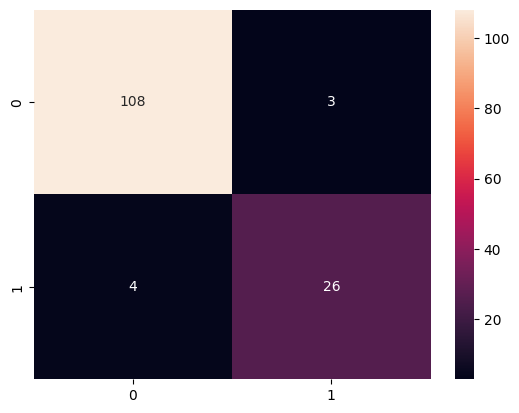

In [ ]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
f1_svc = f1_score(y_test , svc_pred)*100
print(f"F1 Score: {f1_svc:.2f}")
re_svc = recall_score(y_test , svc_pred)*100
print(f"Recall Score: {re_svc:.2f}")
pre_svc = precision_score(y_test , svc_pred)*100
print(f"Precision Score: {pre_svc:.2f}")
cm = confusion_matrix(y_test, svc_pred)
tn, fp, fn, tp = cm.ravel()
speci_svc = tn / (tn + fp)*100
print(f"Specificity: {speci_svc:.2f}")
acc_svc = accuracies.mean()*100
print(f"Accuracy:{(acc_svc):.2f}")
print(classification_report(y_test, svc_pred))
sns.heatmap(confusion_matrix(y_test,svc_pred), annot= True, fmt= 'g')

ROC AUC: 96.67


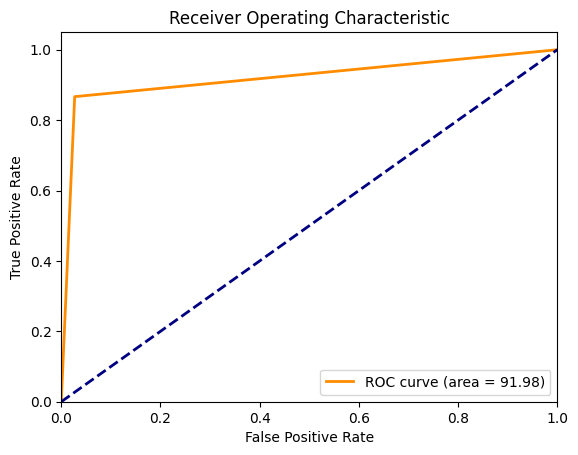

In [ ]:
fpr, tpr, _ = roc_curve(y_test, svc_pred)
roc_svc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_rf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()